Serendipity is a system to replicate the aspect of behavior where a being wants something untill it gets bored and decides to have something else. This "saturation" behavior is characterized in differential equations for the emotional aspect, neural nets (but simple matricies for now to simplify calculation) for the thinking part of human behavior.

The name Serendipity is chosen, because, if successful, the computer can generate pleasing items for the user without any human expectation. Life becomes an unexpected happy surprise.

Key Terms:
C: Choice (Matrix) Map, a maping from a decision to the raw utility
d: Decision vector, a decision vector that is the consists of a combination of choices someone makes
l: Vector of duration of choices
u: utility vector, a vector of raw utility that feed into the differetial 'saturation' system
y: Happiness vector of the differential system that saturates, reducing the affect that utility has on increasing the output y.
a: Addiction vector, the rate at which y will naturally decrease due to it's value the stable value
b: Bordom vector, the rate at which in increase of y will decrease how much y increases form u

m: dimention of the y, u, a and b
n: dimention of the d matrix


High a, low b: A human need that saturates quicking, making it lasts a short time during it's enjoyment, but then is required again very quicking.

State Equations:
u = C * d; (If C is simplified to a matrix. Probably some neural net in real life.
d(y_i(t))/d(t) = (u_i - y_i^a_i)/y_i^b_i (Is it really multiplication by gain or exponent?)

Problem Statement: Identify the best d so that sum of ys is maximized for the long term.

Getting Familiar with the lingo:

These may seem obscure without day to day explainations for the quantities.

High a, Low b:  A human desire that saturates quicking, making it often lasts a short time during it's enjoyment, but then falls quickly, meaning is desired again very quicking. Think of a very frequent, addictive drug. Easy Come, Easy go.

High a, High b: A human desire that need that saturates quickly, making it often last a short time during enjoyment, but then pleasure lasts a longer time. Perhaps sex for one who is not terribly addicted. Easy come, slow go.

Low a, high b: A human desire that takes a long time to saturate, but when is needed again, isn't needed again after a long time. Think of a vacation. Slow come, slow go. Perhaps food as well?

Low a, Low b: A human desire that takes a long time to saturate, but then is needed again very quickly. Difficult to think of examples. Perhaps resting, or videogames? Slow come, easy go.



Example of uses:
Music:
n = 6: Need to pick one of 6 songs.
d = [0;
     0;
     0;
     0;
     1;
     0;
     0];
     (fifth song chosen). You cannot listen to multiple songs at onese
     
     
C = [v1, v2, v3, v4, v5, v6]. Vector of utility received from each song.





Restuarant and Food:




Porn:

Questions:
Do drugs have a high u value, or do they have a high a and low b value?
Are they more addictive because they yield so much pleasure, or because they make y component rise quickly and fall quickly? Is it the chemical or the drug?
    My hunch: Drugs just have a high u value or maybe a unique exception that tweaks the a and b value temporarily! Need to research affect of drugs. Do they directly cause great enjoyment, or make things greatly enjoyable. Do they affect the input, or the system gains.

Is addictiion as we know it now, determined by the addictiveness component attached to a, or from the difference of a higher averaged value of y.

desire_size= 9
choice_size= 9
addiction_rates= [0.70668404 0.342355   0.87726332 0.58762596 0.41969329 0.62523724
 0.28338383 0.73444232 0.79301848]
bordom_rates= [9.49550483 3.2844554  4.81966809 2.04525656 7.88297092 1.97460191
 8.1807754  5.13947678 6.33448333]
choice_durations= [4.37033857 0.55656728 3.99263739 0.73797104 5.92048854 0.40963489
 4.38462842 6.6552248  3.55494515]
choice_matrix= [[9.48143889 7.12669501 6.23826033 6.33843075 0.70878795 4.10912351
  7.80241296 0.61844859 9.42839379]
 [2.80677571 8.85402078 8.80798317 5.0903786  3.785081   8.24751766
  2.0470763  8.0495779  8.84858727]
 [1.492921   3.92851827 9.84936226 0.0125812  6.36296939 0.69810957
  9.10327046 5.95719321 9.48367816]
 [8.57534483 3.99106505 0.22327659 4.75420099 3.06136184 6.90407248
  6.44058811 1.30932833 4.68135862]
 [5.02414355 1.43755163 4.78086381 1.43505597 7.80007306 3.36427471
  0.80387154 4.76023305 0.77401803]
 [8.93795379 9.73338688 5.5653225  5.39215149 6.92073665 8.25913116
  6.26682348

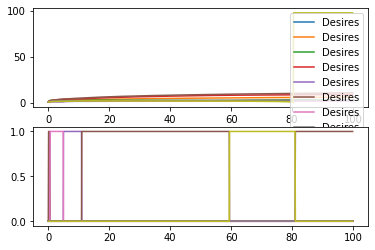

In [62]:
import numpy as np
from matplotlib import pyplot as plt 

desire_size = 9 #np.random.randint(8)+3
choice_size = 9 # np.random.randint(8)+3


addiction_rates = np.random.rand(desire_size)      # Addiction Rate
bordom_rates = np.random.rand(desire_size)*10         # Bordom Rate
choice_durations = np.random.rand(desire_size)*10  # Duration of the activities
choice_matrix = np.random.rand(desire_size,choice_size)*10

''' 
addiction_rates= np.array([0.7368628  0.19592304 0.69433694 0.54610531 0.10168123 0.60342817
 0.42404334 0.854417   0.8601921 ])
bordom_rates= np.array([2.59027485 7.20447594 1.9134948  6.05508924 6.02267066 7.57101154
 1.62821027 8.64957142 0.43113601])
choice_durations= np.array([9.97180649 2.3072861  8.39339982 1.71456334 9.26622403 5.85785508
 6.81249746 8.82433155 6.77780505])
choice_matrix= [[6.29899977 7.69781923 5.98363594 8.89742588 9.78923503 3.31437222
  1.70242755 4.87238681 8.61239389]
 [7.32427914 3.52240213 4.64950847 3.51888158 8.2535657  3.19494106
  6.51888693 2.60797236 7.90317967]
 [5.61802763 5.22705482 2.89634062 5.98367515 5.30359566 2.42515768
  7.58396153 1.46951801 1.04731805]
 [7.3110798  6.86062671 0.84681891 2.30222652 2.34649265 8.30609952
  9.41154034 6.8612837  8.14271316]
 [5.65085389 4.75075521 4.19539397 8.99489661 5.53140686 1.45505359
  4.35715221 1.18626723 4.13122604]
 [3.42145464 7.73404324 3.49687119 5.9952353  2.65743356 0.7490627
  1.96535077 0.65974524 4.35089826]
 [8.16659937 6.45981339 9.09763368 5.96243496 5.46962864 5.42001811
  3.51164277 7.34384164 3.05339628]
 [6.12932069 2.15483973 8.01695498 8.16191808 4.2488878  4.48875443
  2.23319464 2.41442168 5.05280818]
 [1.55683979 2.55297133 8.9321671  0.3593216  1.89679059 2.30642151
  9.25104027 7.47862859 5.44154247]]

'''



start = 0
stop = 100
step = 000.1

time_range = np.arange(start, stop, step)
desires = np.ones((desire_size,np.size(time_range)))
desires_dot = np.zeros((desire_size,1))

predicted_desires = np.zeros((desire_size,choice_size))
current_choice_duration_remaining = -1;

prior_best_decision = -1;
choice_graph = np.zeros((choice_size, np.size(time_range)))



print("desire_size=", desire_size)
print("choice_size=", choice_size)
print("addiction_rates=", addiction_rates)
print("bordom_rates=", bordom_rates)
print("choice_durations=", choice_durations)
print("choice_matrix=", choice_matrix)



#System simulation
for time_index in range(np.size(time_range)-1):
    if(current_choice_duration_remaining < 0):
        for decision in range(choice_size):
            utility = choice_matrix[:, decision]
            for i in range(desire_size):
                predicted_desires[i, decision] = (utility[i]-(desires[i][time_index])**addiction_rates[i])/(desires[i][time_index])**bordom_rates[i]
        best_decision = np.argmax(predicted_desires.sum(axis=1, dtype='float'))
        current_choice_duration_remaining = choice_durations[best_decision]
        if(prior_best_decision!=best_decision):
            #print("Decision {} chosen at time {}".format(best_decision, time_index))
            prior_best_decision = best_decision
    utility = choice_matrix[:, best_decision]
    for i in range(desire_size):
        desires_dot[i] = (utility[i]-(desires[i][time_index])**addiction_rates[i])/(desires[i][time_index])**bordom_rates[i]
    desires[:,time_index+1] = desires[:, time_index] + step*desires_dot[:,0]
    current_choice_duration_remaining -= step
    choice_graph[best_decision, time_index+1] = 1 

#plt.figure(figsize=(18, 16), dpi=80)
figure, subplot = plt.subplots(2)
#subplot[0].title("Serendipity System Desire Simulation")
#subplot[0].xlabel("Time") 
#subplot[0].ylabel("Desires") 
for i in range(desire_size):
    subplot[0].plot(time_range,desires[i],label = 'Desires')
subplot[0].legend()

for i in range(choice_size):
    subplot[1].plot(time_range,choice_graph[i],label = 'Choices')

plt.show()